In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

%matplotlib inline
sns.set(style='white')
colors = [['dimgray', 'forestgreen', 'red', 'navy', 'royalblue', 'maroon'],
          ['dimgray', 'forestgreen', 'red', 'maroon', 'royalblue', 'navy', 'purple'],
          ['forestgreen', 'red', 'royalblue']]
np.random.seed(0)

In [2]:
# Loading the data

dataset_3 = pd.read_csv('data/cluster_ds3.csv',
                  header=0,
                  index_col=None)

dataset_4 = pd.read_csv('data/cluster_ds4.csv',
                  header=0,
                  index_col=None)

dataset_5 = pd.read_csv('data/cluster_ds5.csv',
                  header=0,
                  index_col=None)

In [3]:
# Function to plot

def plot_scatter(df, labels, colors, centers=None, title=None):
    fig = plt.figure(figsize=[10, 7])
    s = sns.scatterplot(x=df['x'],
                        y=df['y'],
                        hue=labels,
                        legend='full',
                        palette=colors,
                        s=60,
                        alpha=0.7)
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if title:
        t = plt.title(title, fontsize=14)
    plt.show()
    plt.close()

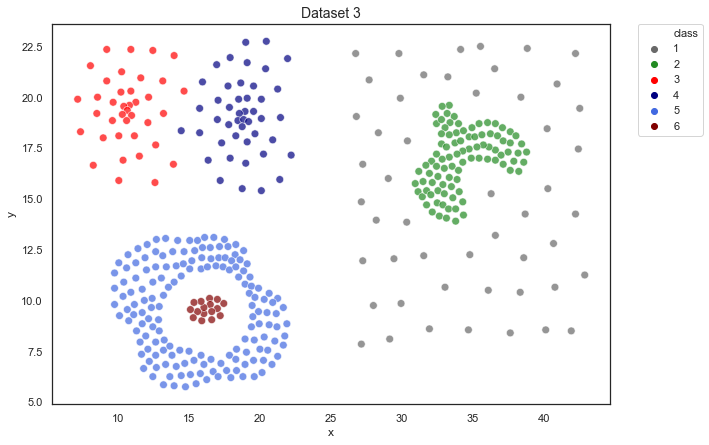

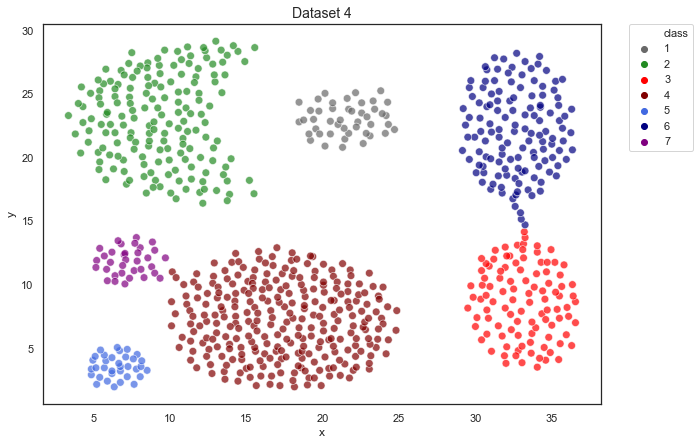

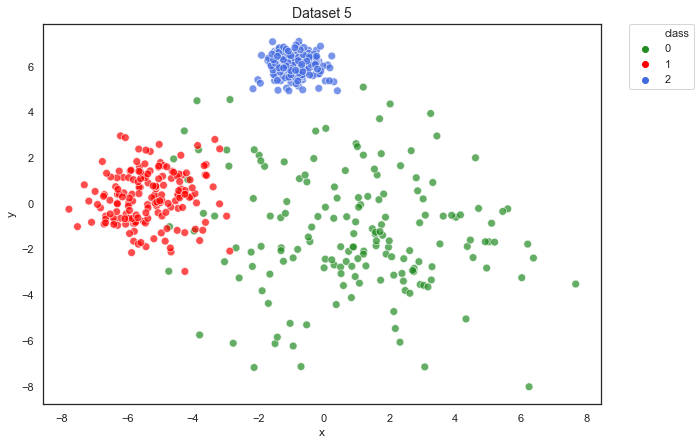

In [4]:
# Original clusters

plot_scatter(dataset_3[['x', 'y']], dataset_3['class'], colors[0], title='Dataset 3')
plot_scatter(dataset_4[['x', 'y']], dataset_4['class'], colors[1], title='Dataset 4')
plot_scatter(dataset_5[['x', 'y']], dataset_5['class'], colors[2], title='Dataset 5')

In [5]:
# Data Analysis

print('=> Dataset 3\n')
dataset_3.info()
print('\n=> Dataset 4\n')
dataset_4.info()
print('\n=> Dataset 5\n')
dataset_5.info()

=> Dataset 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
x        399 non-null float64
y        399 non-null float64
class    399 non-null int64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB

=> Dataset 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
x        788 non-null float64
y        788 non-null float64
class    788 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.6 KB

=> Dataset 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x        500 non-null float64
y        500 non-null float64
class    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [6]:
dataset_3.describe()
dataset_4.describe()
dataset_5.describe()

,x,y,class
count,399.000000,399.000000,399.000000
mean,22.215038,13.970677,3.543860
std,9.736752,4.743516,1.581125
min,7.150000,5.750000,1.000000
25%,14.100000,9.775000,2.000000
50%,18.950000,14.150000,4.000000
75%,32.725000,18.125000,5.000000
max,42.900000,22.750000,6.000000


,x,y,class
count,788.000000,788.000000,788.000000
mean,19.566815,14.171764,3.770305
std,9.922042,8.089683,1.596305
min,3.350000,1.950000,1.000000
25%,11.150000,7.037500,2.000000
50%,18.225000,11.725000,4.000000
75%,30.700000,21.962500,5.000000
max,36.550000,29.150000,7.000000


,x,y,class
count,500.000000,500.000000,500.000000
mean,-1.762312,1.651048,0.998000
std,3.076568,3.566898,0.816903
min,-7.779000,-8.029000,0.000000
25%,-4.657750,-0.872750,0.000000
50%,-1.232000,0.942500,1.000000
75%,-0.174500,5.706500,2.000000
max,7.674000,7.083000,2.000000


In [7]:
# Data preprocessing

def feature_matrix(df):
    return df[['x', 'y']].to_numpy()

In [8]:
# Basic Clustering Algorithms

def cluster(df, k, colors):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(feature_matrix(df))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    plot_scatter(df, labels, colors, centers, 'k-Means')

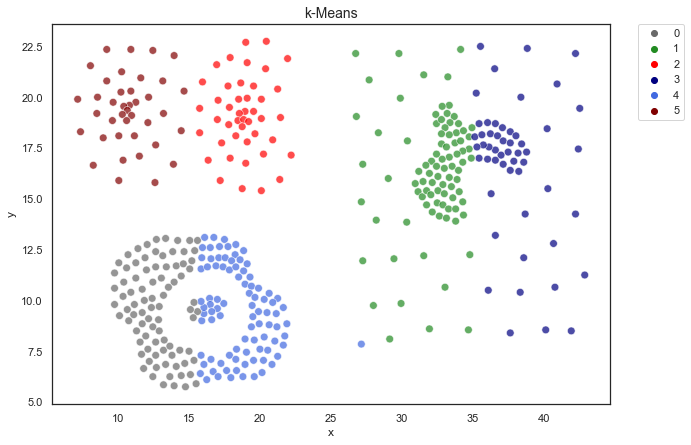

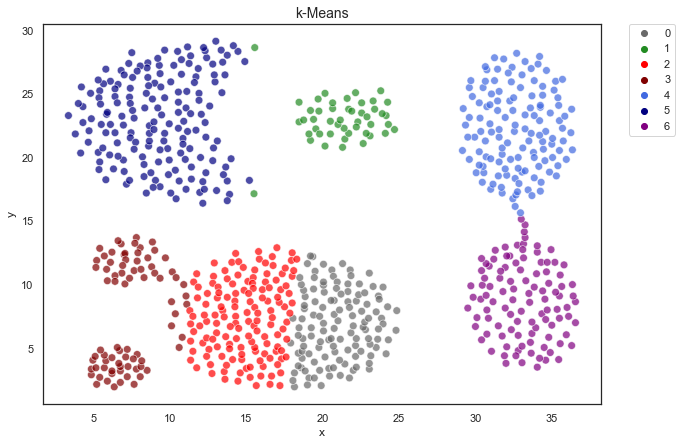

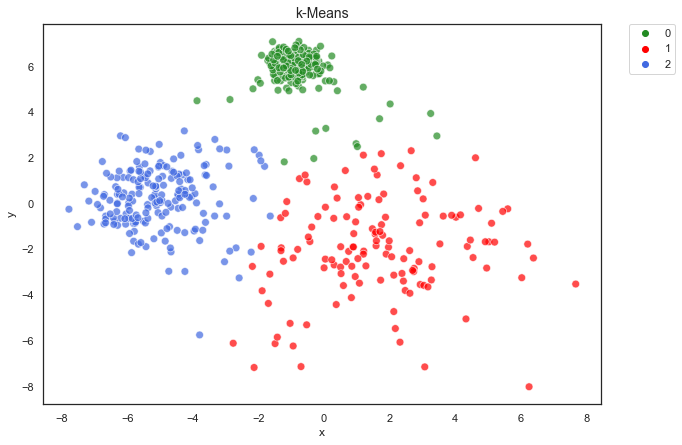

In [9]:
cluster(dataset_3, 6, colors[0])
cluster(dataset_4, 7, colors[1])
cluster(dataset_5, 3, colors[2])